# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing the datasets and preprocessing them

### 1. Dataset containing user_id, movie_id and rating

In [3]:
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('./u.data', sep='\t', names=r_cols, usecols=range(3), encoding="ISO-8859-1")

In [4]:
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [5]:
ratings.shape

(100003, 3)

### 2. Dataset containing movie_id and title

In [6]:
m_cols = ['movie_id', 'title']
movies = pd.read_csv('./u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")

In [7]:
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
movies.shape

(1682, 2)

# Merging the two dataframes 'movies' and 'ratings'  

In [9]:
ratings = pd.merge(movies, ratings)
ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [10]:
ratings.shape

(100003, 4)

In [11]:
ratings.describe()

,movie_id,user_id,rating
count,100003.000000,100003.000000,100003.000000
mean,425.520914,462.470876,3.529864
std,330.797791,266.622454,1.125704
min,1.000000,0.000000,1.000000
25%,175.000000,254.000000,3.000000
50%,322.000000,447.000000,4.000000
75%,631.000000,682.000000,4.000000
max,1682.000000,943.000000,5.000000


# Discovering the correlations

In [12]:
ratings_1 = pd.DataFrame(ratings.groupby('title')['rating'].mean())
ratings_1.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
ratings_1['number_of_ratings'] = ratings.groupby('title')['rating'].count()
ratings_1.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


# Plotting a histogram using pandas plotting functionality to visualize the distribution of the ratings

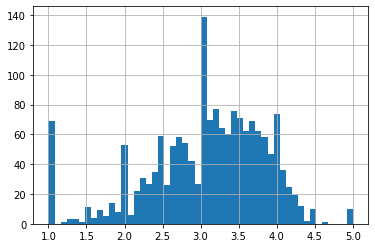

In [14]:
ratings_1['rating'].hist(bins = 50)

# Visualizing the number_of_ratings column 

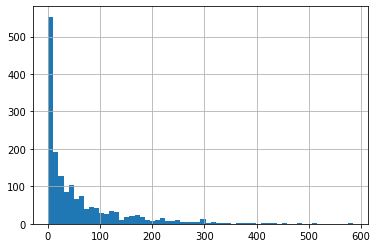

In [15]:
ratings_1['number_of_ratings'].hist(bins = 60)

# Checking the relationship between the rating of a movie and the number of ratings

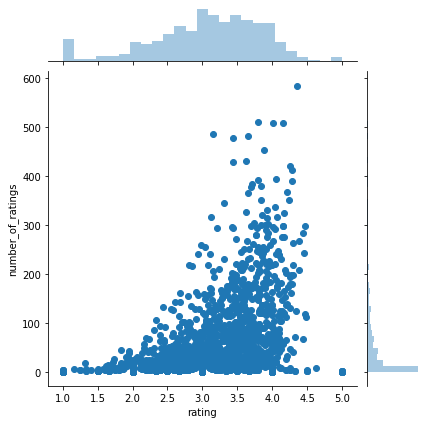

In [16]:
sns.jointplot(x = 'rating', y = 'number_of_ratings', data = ratings_1)

# Discovery and visualization

###  Using pandas pivot_table utility to create the movie matrix

In [17]:
movieRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
movieRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the most rated movies and choosing one of them to work with in this simple recommender system

In [18]:
ratings_1.sort_values('number_of_ratings', ascending = False).head(10)

,rating,number_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


# Taking One Instance from the dataset for Analysis

In [19]:
starWarsRatings = movieRatings['Star Wars (1977)']

In [20]:
starWarsRatings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

# Calculating correlation using pandas corrwith functionality

### Corrwith computes the pairwise correlation of rows or columns of two data frames objects

#### Using this functionality to get the correlation between each movie's rating and the ratings of the Star Wars (1977) movie

In [21]:
similarMovies = movieRatings.corrwith(starWarsRatings)
similarMovies = similarMovies.dropna()

In [22]:
df = pd.DataFrame(similarMovies)
df.head(10)

,0
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


# Analyzing the results

In [23]:
similarMovies.sort_values(ascending=False)

title
No Escape (1994)                          1.0
Man of the Year (1995)                    1.0
Hollow Reed (1996)                        1.0
Commandments (1997)                       1.0
Cosi (1996)                               1.0
                                         ... 
Theodore Rex (1995)                      -1.0
I Like It Like That (1994)               -1.0
Two Deaths (1995)                        -1.0
Roseanna's Grave (For Roseanna) (1997)   -1.0
Frankie Starlight (1995)                 -1.0
Length: 1410, dtype: float64

# Data Transformation

In [24]:
movieStats = ratings.groupby('title').agg({'rating': [np.size, np.mean]})

In [25]:
movieStats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

# Sorting datasets by a metric

In [26]:
popularMovies = movieStats['rating']['size'] >= 100

In [27]:
movieStats[popularMovies].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          584  4.359589
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

# Joining two dataframes

In [28]:
df = movieStats[popularMovies].join(pd.DataFrame(similarMovies, columns=['similarity']))

In [29]:
df.head()

,"(rating, size)","(rating, mean)",similarity
title,,,
101 Dalmatians (1996),109,2.908257,0.211132
12 Angry Men (1957),125,4.344000,0.184289
2001: A Space Odyssey (1968),259,3.969112,0.230884
Absolute Power (1997),127,3.370079,0.085440
"Abyss, The (1989)",151,3.589404,0.203709


# Analyzing the final results

In [30]:
df.sort_values(['similarity'], ascending=False)[:15]

,"(rating, size)","(rating, mean)",similarity
title,,,
Star Wars (1977),584,4.359589,1.000000
"Empire Strikes Back, The (1980)",368,4.206522,0.748353
Return of the Jedi (1983),507,4.007890,0.672556
Raiders of the Lost Ark (1981),420,4.252381,0.536117
Austin Powers: International Man of Mystery (1997),130,3.246154,0.377433
"Sting, The (1973)",241,4.058091,0.367538
Indiana Jones and the Last Crusade (1989),331,3.930514,0.350107
Pinocchio (1940),101,3.673267,0.347868
"Frighteners, The (1996)",115,3.234783,0.332729
